## Solução simbólica

# Modelagem de plano de previdência privada

O saldo $s(t)$ da conta varia de acordo com:
*   taxa de juros mensal $r$;
*   o próprio saldo $s(t)$.
*   os depósitos mensais $k$

Modela-se pela EDO:
$$\dfrac{d}{dt}s(t) = r \, s(t)  + k$$




In [149]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

## Primeira parte da vida - economizando
Sejam os valores abaixo definidos:

In [150]:
s0 = 0
r = 0.25/100
k = 1000
dt = 40*12

In [151]:
t= sp.symbols("t")
s = sp.Function("s")

In [152]:
ode = sp.Eq(sp.Derivative(s(t),t) , r*s(t) + k)
ode

Eq(Derivative(s(t), t), 0.0025*s(t) + 1000)

In [153]:
s_sol = sp.dsolve(ode,s(t),ics={s(0):s0})
s_sol.args[1]

400000.0*exp(0.0025*t) - 400000.0

In [154]:
s_depositado = sp.lambdify(t,s_sol.args[1])
s_aposentado = s_depositado(dt)
juro = s_aposentado - k*dt
ANOS = np.floor(dt/12)
print("Após ",ANOS,"anos.......")
SALDO = np.floor(s_aposentado/1000)
print("Saldo: ",SALDO,"mil reais")
DEPOSITADO = np.floor(k*dt/1000)
print("Depositado: ",DEPOSITADO,"mil reais")
JURO = np.floor(juro/1000)
print("Juros: ",JURO,"mil reais")

Após  40.0 anos.......
Saldo:  928.0 mil reais
Depositado:  480.0 mil reais
Juros:  448.0 mil reais


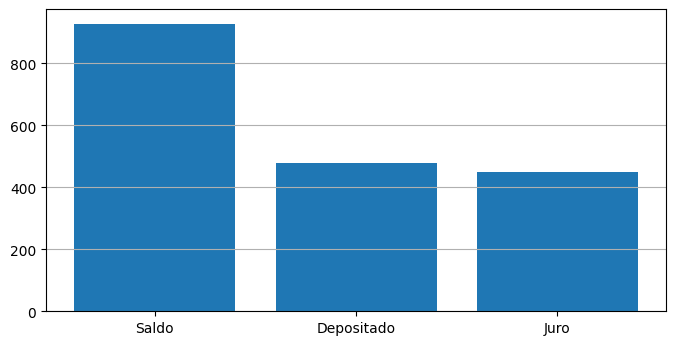

In [155]:
plt.figure(dpi=100,figsize=(8,4))
height = [SALDO,DEPOSITADO,JURO]
bars = ('Saldo', 'Depositado', 'Juro')
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)
plt.xticks(y_pos, bars)
plt.grid(axis='y')
plt.show()

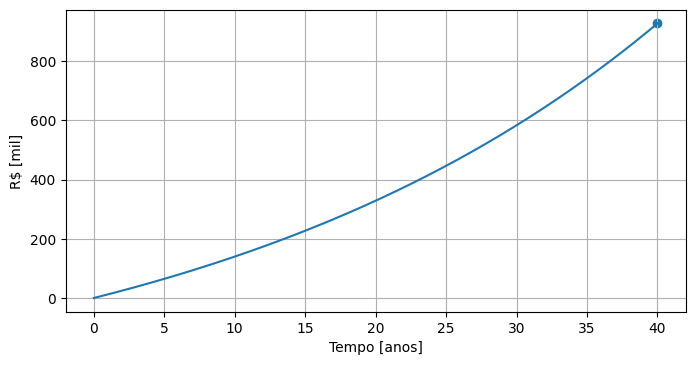

In [156]:
tt = np.arange(0,dt+1,1)
plt.figure(dpi=100,figsize=(8,4))
plt.plot(tt/12,s_depositado(tt)/1000)
plt.grid()
plt.xlabel('Tempo [anos]')
plt.ylabel('R$ [mil]')
plt.scatter(dt/12,s_depositado(dt)/1000)
plt.show()

## Segunda parte da vida - vivendo de suas economias

In [157]:
s0 = s_aposentado
r = 0.25/100
dt = 20*12

In [158]:
t,k= sp.symbols("t k")
s = sp.Function("s")

Lembrando que aqui colocamos $k$ como negativo, pois tratam-se de retiradas.

In [159]:
ode = sp.Eq(sp.Derivative(s(t),t) , r*s(t) - k)
ode

Eq(Derivative(s(t), t), -k + 0.0025*s(t))

Separando o lado direito da equação com `s_sol.args[1]`

In [160]:
s_sol = sp.dsolve(ode,s(t),ics={s(0):s0})
s_sol.args[1]

400.0*k + (928046.769094619 - 400.0*k)*exp(0.0025*t)

Quanto o tempo é susbsituído como o tempo de apostadoria (ou tempo de vida de aposentado), econtra-se o valor $k$ de retiradas mensais que seja sustentável.

In [161]:
s_morte = s_sol.args[1]
s_morte = s_morte.subs(t,dt)
s_morte

1691011.46560897 - 328.847520156204*k

Experssão que iguala a zero o saldo no fim da vida.

In [162]:
xxx = sp.Eq( s_morte, 0)
xxx

Eq(1691011.46560897 - 328.847520156204*k, 0)

Isolando o valor da retirada mensal.

In [163]:
kk = np.double(sp.solve(xxx))
kk = kk/1000
kk = np.round(kk,decimals=2)
print("Aposentadoria: ",kk," mil reais por mês")


Aposentadoria:  [5.14]  mil reais por mês


In [164]:
tt = np.arange(0,dt+1,1)
s_morte = s_sol.args[1]
s_morte

400.0*k + (928046.769094619 - 400.0*k)*exp(0.0025*t)

Transformando a função simbólica encontrada em uma função numérica, a depender do tempo $t$ e da retirada $k$.

In [165]:
s_num = sp.lambdify([t,k],s_morte)
s_num

<function _lambdifygenerated>

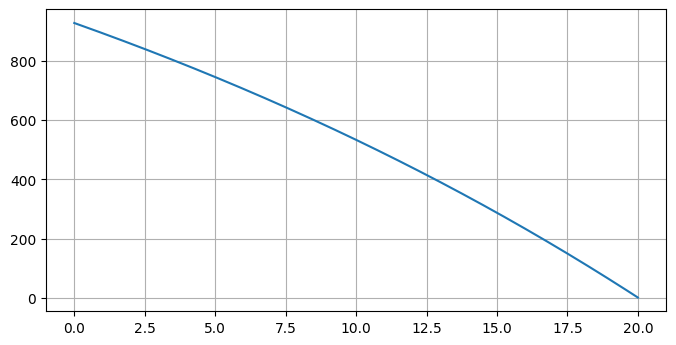

In [167]:
plt.figure(dpi=100,figsize=(8,4))
plt.plot(tt/12,s_num(tt,kk*1000)/1000)
plt.grid()